# Part 1 - The basics

R is just a calculator.

In [110]:
4+3

[1] 7

There is special syntax for multiplication and division.

We can also assign numbers to variables and to operations.

In [111]:
a <- 4
b <- 16
a+b

[1] 20

A function is just something with an input and an output.

In [112]:
sum(4, 3, 5, 10)

[1] 22

In [113]:
sqrt(2)

[1] 1.414214

In [114]:
sum(a, b)
sqrt(a)

[1] 20

[1] 2

# Part 2 - A bit more advanced

The nice thing about R is that unlike on a calculator, you can keep track of your operations. This is important for reproducing your work, and doing more complicated stuff. Let's look at some of this more complicated stuff!

We can assign lists of numbers to variables. This is called an array.
'c' is just a function. It means 'concatenate'.

In [115]:
a <- c(1, 2, 3, 4, 5)
b <- c(2, 2, 2, 2, 2)
a
b

[1] 1 2 3 4 5

[1] 2 2 2 2 2

We can do operations on lists too, the same as for simpler variables.
We can make a new variable in the process.

In [116]:
c <- a + b

To see the output, you need to call the variable directly.

In [117]:
c

[1] 3 4 5 6 7

We can use other functions to make lists. We can make sequences...

In [118]:
a <- seq(0, 20, 2)
a

[1]  0  2  4  6  8 10 12 14 16 18 20

...or repeat numbers

In [119]:
b <- rep(2, 5)
b

[1] 2 2 2 2 2

We can also generate random lists.

In [120]:
weight1 <- runif(30 ,60, 120)
weight2 <- runif(30, 80, 140)



A uniform distribution is a probability distribution in which all outcomes are equally likely, resulting in a constant probability density across a specified interval.

If you are unsure about how a function works, there's a built-in way to get help:

In [121]:
# ?runif

We don't have to use a uniform distribution. Actually, a normal distribution will be better. Let's do that instead.

In [122]:
weight1 <- rnorm(30, 60, 10)
weight2 <- rnorm(30, 80, 10)

A normal distribution is a symmetric, bell-shaped probability distribution characterized by its mean and standard deviation, where approximately 68% of the data falls within one standard deviation of the mean.

We can also make lists of words. This can be useful if our variables are categorical. 

In [123]:
species1 <- rep("Deer", 30)
species2 <- rep("Reindeer", 30)

We can also manipulate arrays. This can be necessary for tidying data, and getting it into the right format. We can for example append one array to another. We just use the c() function for this.

In [124]:
weight <- c(weight1, weight2)
species <- c(species1, species2)

This gives us our weights and species as nice tidy data arrays. We can also organise our data into spreadsheets like excel. These are called data frames in R.

In [125]:
deerstudy <- data.frame(weight, species)

You can always take a look at the dataframe by calling it.

In [126]:
# deerstudy

We can look at just the top of this spreadsheet.

In [147]:
head(deerstudy)

,weight,species
,<dbl>,<chr>
1,62.49092,Deer
2,69.32662,Deer
3,53.57687,Deer
4,56.54208,Deer
5,63.85358,Deer
6,64.17887,Deer


We can also pick out specific variables to do stuff to. We use the '$' for this.

In [148]:
deerstudy$species

[1] "Deer"     "Deer"     "Deer"     "Deer"     "Deer"     "Deer"    
 [7] "Deer"     "Deer"     "Deer"     "Deer"     "Deer"     "Deer"    
[13] "Deer"     "Deer"     "Deer"     "Deer"     "Deer"     "Deer"    
[19] "Deer"     "Deer"     "Deer"     "Deer"     "Deer"     "Deer"    
[25] "Deer"     "Deer"     "Deer"     "Deer"     "Deer"     "Deer"    
[31] "Reindeer" "Reindeer" "Reindeer" "Reindeer" "Reindeer" "Reindeer"
[37] "Reindeer" "Reindeer" "Reindeer" "Reindeer" "Reindeer" "Reindeer"
[43] "Reindeer" "Reindeer" "Reindeer" "Reindeer" "Reindeer" "Reindeer"
[49] "Reindeer" "Reindeer" "Reindeer" "Reindeer" "Reindeer" "Reindeer"
[55] "Reindeer" "Reindeer" "Reindeer" "Reindeer" "Reindeer" "Reindeer"

We can also save our spreadsheet.

In [149]:
save(deerstudy, file = "Deerstudy.RData")

# Part 3 - Basic plotting

Plotting is very important. It allows you to see relationships between variables. There are different kinds of plots that are useful for different kinds of relationships.

If you want to plot something very quickly, base R (when you don't download any extra packages) has some great options.

To visualize the relationship between two continuous variables, you can use a scatterplot...

In [150]:
plot(a, c)

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


In [151]:
plot(c~a)

ERROR: Error in (function (formula, data = NULL, subset = NULL, na.action, drop.unused.levels = FALSE, : variable lengths differ (found for 'a')


... while boxplots tell you the relationship between categorical and continuous variables.

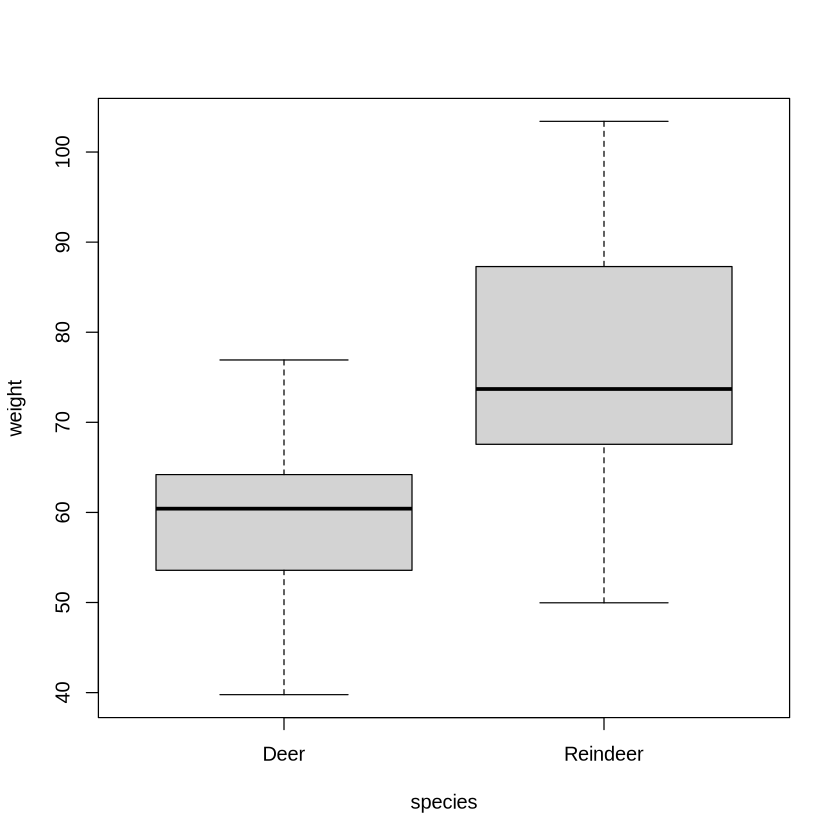

In [152]:
boxplot(weight~species)

The tilde "~" is important in R. It can be read to mean "as a function of", or "distributed as". You will see it again, and you will get used to it. This little syntactic difference is important, because it can allow us to make the same plot using different kinds of data structures. 

These plots are a bit ugly. Even base R can make beautiful plots, you can look at options to fancy plots up using the ?plot command.

A lot of the R community uses a package called ggplot2 to plot. It is very well-documented online and has a lot of options for customization. Packages are like modules in Python. We'll talk a bit more about packages next class. For now, let's just install and load:

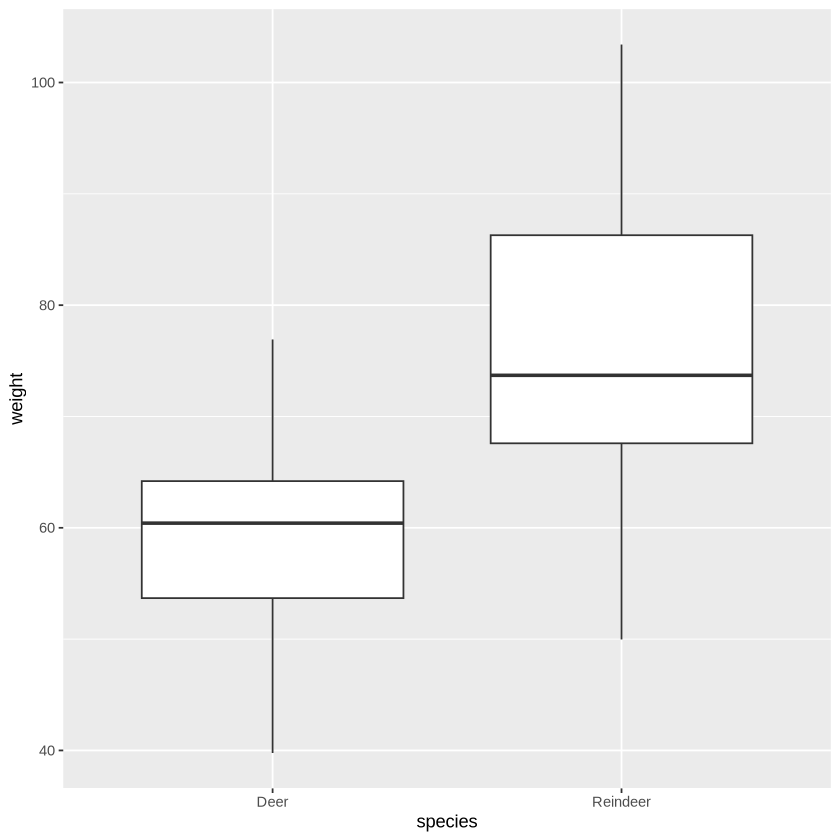

In [153]:
ggplot(deerstudy,
      aes(x = species,
         y = weight)) +
    geom_boxplot()

ggplot2 is a very modular way of plotting. You give commands in a sequential order, and the output of one command is passed to the command with a '+' operator.

The first block (before the + sign) specifies the data we want to use and how we want to use it. Using + signs, we can add extra options, for example the style of plot. You can really go crazy with the customizations!

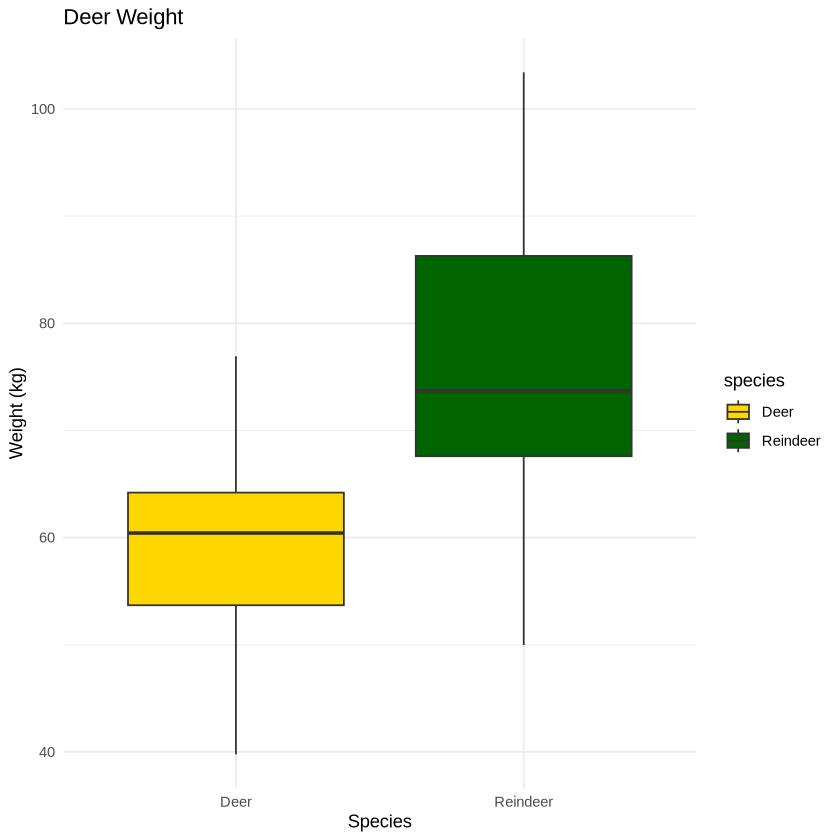

In [154]:
ggplot(deerstudy,
       aes(x = species,
           y = weight,
          fill = species)) +
    geom_boxplot() +
    scale_fill_manual(values = c("gold", "darkgreen")) +
    labs(title = "Deer Weight",
        x = "Species",
        y = "Weight (kg)") +
    theme_minimal()

There are several excellent resources for learning about ggplot2. Try to play around with them. For example: https://rstudio.github.io/cheatsheets/html/data-visualization.html

You have encountered some basic plotting functions in R. You have learned the tilde operator. You have learned how to search the help documentation.

# Part 4 - Indexing and basic statistics

R is a statistical language, and so it has functions for running statistical operations and models.

We can calculate the average a of variable:

In [155]:
mean(weight1)
mean(weight2)
mean(weight)

[1] 59.41257

[1] 75.44515

[1] 67.42886

Sometimes we are interested in sorting or carving our data up, and doing stats on a part of it. We can use indexing for this. For example, we might just want the average of each species in our study

Let's look at how to extract weights for either just the Deers or the Reindeers in our study

In [156]:
weight[species=="Deer"]

[1] 62.49092 69.32662 53.57687 56.54208 63.85358 64.17887 50.05279 64.19871
 [9] 57.71905 67.65904 59.56385 50.48445 64.95987 39.77205 50.97548 75.86205
[17] 47.30880 45.88566 60.41794 68.76857 69.58291 76.92037 58.03724 54.00342
[25] 63.05850 45.08035 61.97883 56.79160 60.41904 62.90757

In [157]:
weight[species=="Reindeer"]

[1]  60.74507  67.56070  67.67615  70.59859  73.75940  71.64520  87.62768
 [8]  54.23250  87.98217  64.10985  73.40743  73.72836  73.66494  49.96827
[15]  87.33591  79.98964  89.87430  94.11880  62.67937  83.25926  73.12758
[22]  60.38114  70.55733  78.98884  75.07632 103.40786  66.65766  80.25687
[29]  87.28941  93.64785

...so that we can compare the average weight

In [158]:
mean(weight[species=="Deer"])

[1] 59.41257

In [159]:
mean(weight[species=="Reindeer"])

[1] 75.44515

Indexing is incredibly useful. You need to know it. But it is awkward for data frames. We can make a table instead using some basic data manipulation functions. This new table is a new data frame

In [160]:
mean_table <- deerstudy %>%
    group_by(species) %>%
    summarize(Mean_weight = mean(weight))

In [161]:
mean_table

species,Mean_weight
<chr>,<dbl>
Deer,59.41257
Reindeer,75.44515


This is the exact same logic as with the plotting. First you define the data you are working on, then you sequentially operate on it. This is called "piping".

The mean is only one statistic. We can also look at other statistics. How about the median?

In [162]:
median_table <- deerstudy %>%
    group_by(species) %>%
    summarize(Median_weight = median(weight))

In [163]:
median_table

species,Median_weight
<chr>,<dbl>
Deer,60.41849
Reindeer,73.69665


We can also look at the standard deviation.

In [164]:
sd_table <- deerstudy %>%
    group_by(species) %>%
    summarize(Standard_deviation = sd(weight))

In [165]:
sd_table

species,Standard_deviation
<chr>,<dbl>
Deer,8.937395
Reindeer,12.440957


Now we are almost ready to do some statistics. We will cover statistical concepts in the next lecture. BUt as a teaser, let's look at a quick comparison, and see if these means are really different.

In [166]:
t.test(weight1, weight2)


	Welch Two Sample t-test

data:  weight1 and weight2
t = -5.7326, df = 52.637, p-value = 4.902e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -21.64305 -10.42211
sample estimates:
mean of x mean of y 
 59.41257  75.44515 


You have learned about indexing. You have learned about basic statistical functions. You have learned how to generate summary tables. You have run your first statistical simulation, and your first hypothesis test.

In [167]:
early_class <- c(5, 6, 8, 7, 7, 8, 8, 4, 5, 5)

In [168]:
late_class <- c(7, 6, 8, 8, 8, 8, 7.5, 7, 5, 7)

In [169]:
# length(early_class)
early <- rep("early", 10)

In [170]:
# length(late_class)
late <- rep("late", 10)


In [171]:
library(ggplot2)
library(dplyr)

In [108]:
sleep <- c(early_class, late_class)
class <- c(early, late)
sleepstudy <- data.frame(sleep, class)

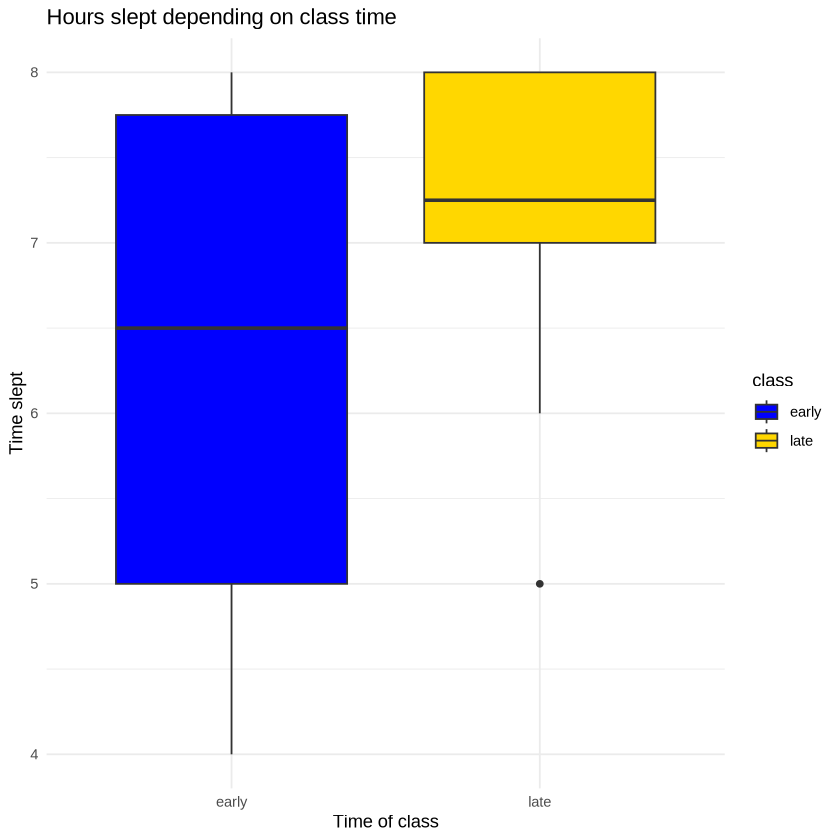

In [109]:
ggplot(sleepstudy,
       aes(x = class,
           y = sleep,
          fill = class)) +
    geom_boxplot() +
    scale_fill_manual(values = c("blue", "gold")) +
    labs(title = "Hours slept depending on class time",
        x = "Time of class",
        y = "Time slept") +
    theme_minimal()

In [198]:
table <- sleepstudy %>%
    group_by(class) %>%
    summarize(Mean_sleep = mean(sleep),
            Median_sleep = median(sleep),
            Standard_deviation = sd(sleep))
table

class,Mean_sleep,Median_sleep,Standard_deviation
<chr>,<dbl>,<dbl>,<dbl>
early,6.30,6.50,1.494434
late,7.15,7.25,1.001388


In [199]:
t.test(early_class, late_class)


	Welch Two Sample t-test

data:  early_class and late_class
t = -1.4942, df = 15.726, p-value = 0.1549
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.0576563  0.3576563
sample estimates:
mean of x mean of y 
     6.30      7.15 
